## 函数适应度变化

-0.7142857142857143
-0.6428571428571429
-0.6964285714285713


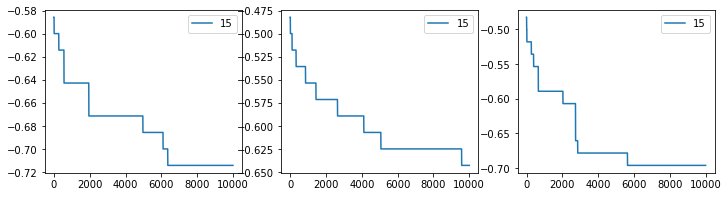

In [1]:
from config import *
import json 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

num_bats = 3
num_sws = 15
steps = ga_steps
nums = ga_nums
pc = pc_opti
pm = pm_opti 

weights_ = [weights1,weights2,weights3]

fig,ax = plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    weight = weights_[i]
    res_path = './results/opti_process_'+str(num_bats)+'_'+str(num_sws)+'_'+weight['name']+'_'+str(steps)+'_'+str(nums)+'_'+str(pc)+'_'+str(pm)+'.csv'
    df_res = pd.read_csv(res_path)
    fitness = df_res['best_fitness'].values
    print(fitness[-1])
    ax[i].plot(fitness,label=num_sws)
    ax[i].legend()


## 最优适应度比较

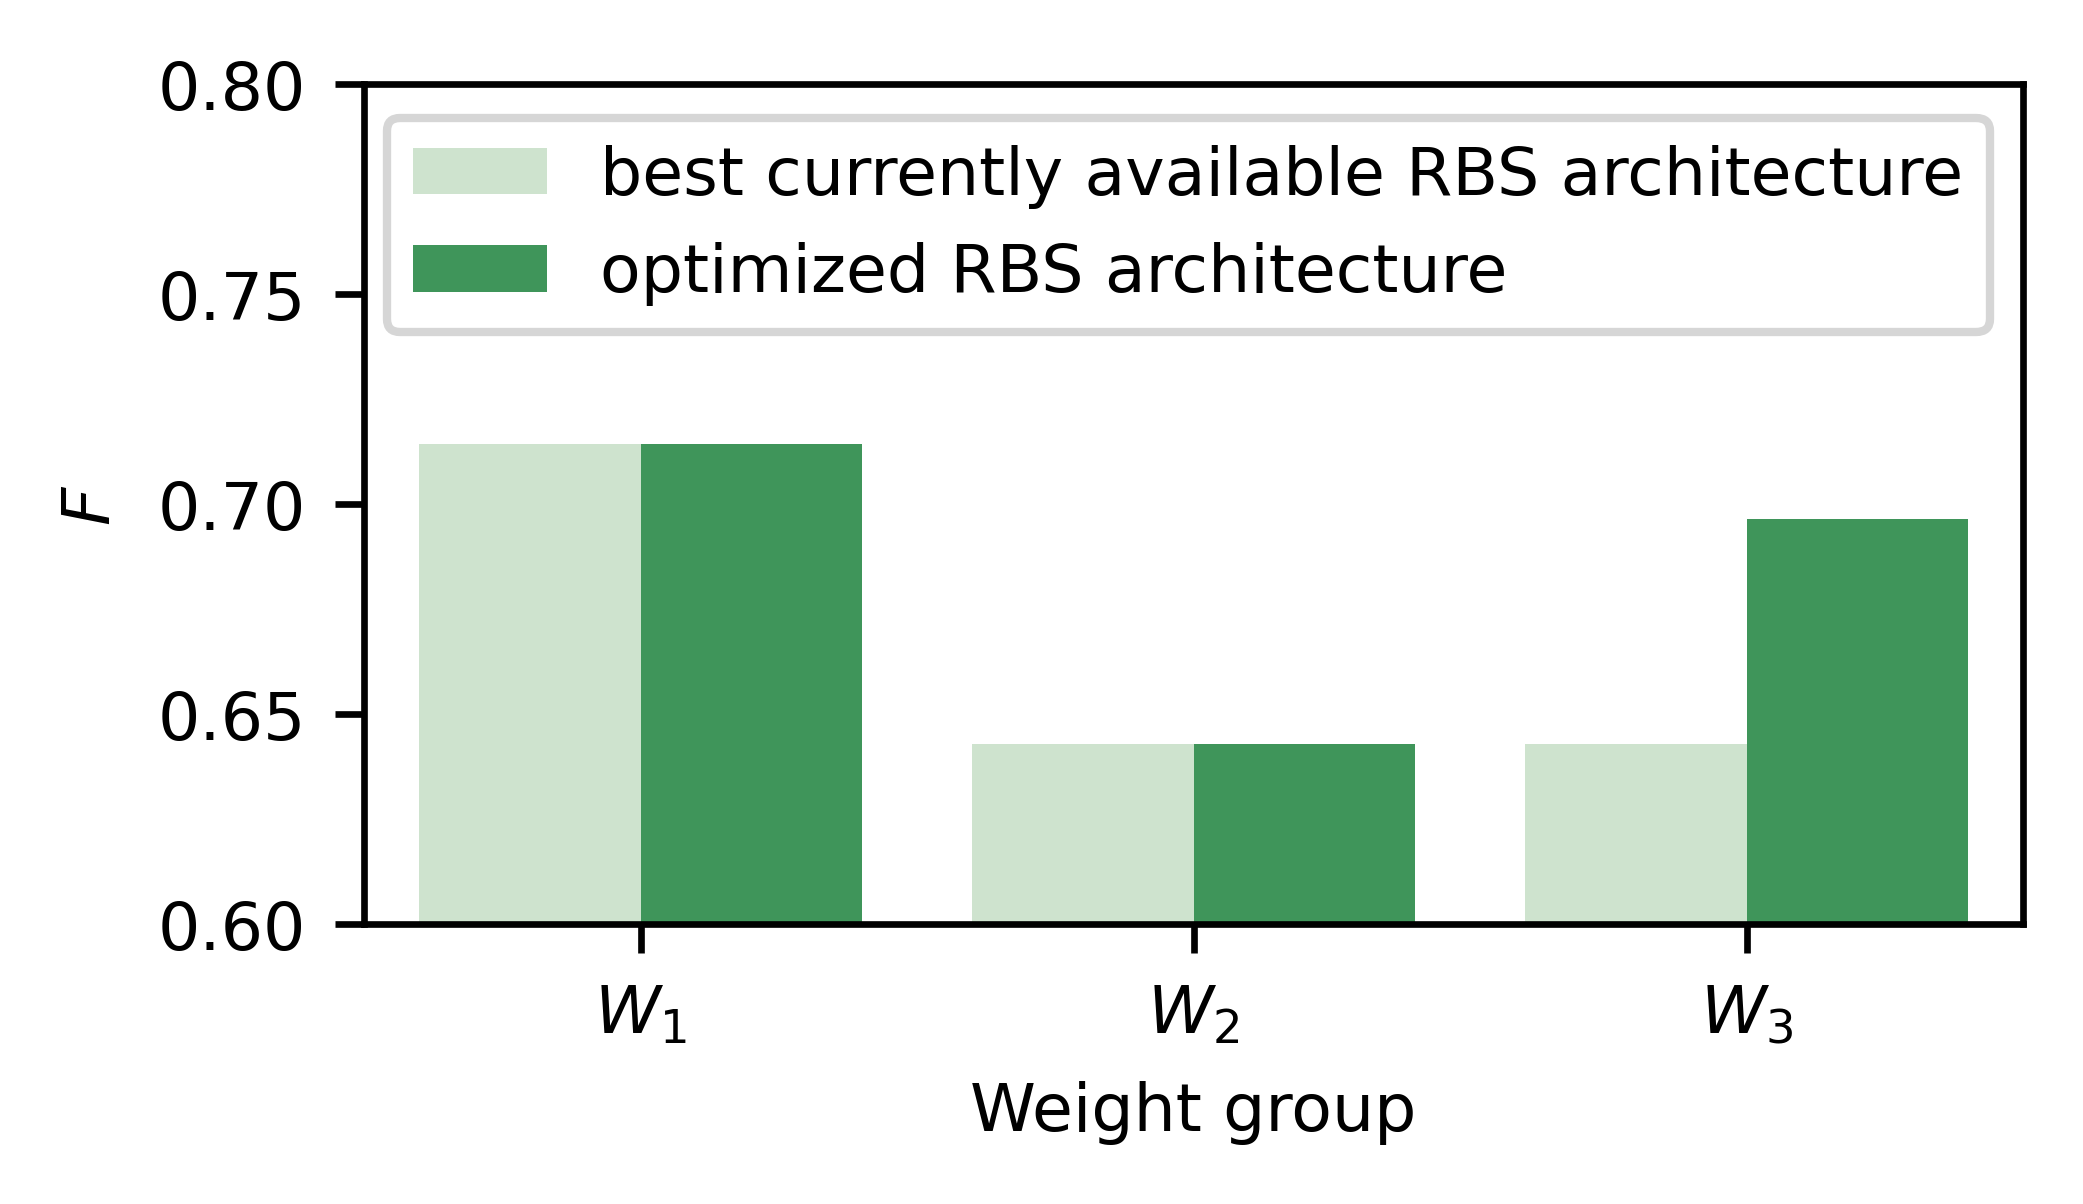

In [4]:
from config import *
import matplotlib.pyplot as plt 
import pandas as pd
from task import *
import seaborn as sns

num_bats = num_bats_hpar
steps = ga_steps
nums = ga_nums
pc = pc_opti
pm = pm_opti
Weigths = [weights1,weights2,weights3]
best_fits, weight_names,rbs_cate = [], [], []
for weight in Weigths:
    fit_rbs = []
    for rbs in rbs_names_eva:
        data_path = './results/indicator_'+rbs+'_'+str(num_bats)+'.csv'
        df_data = pd.read_csv(data_path)
        fitness = 0
        for fea in ['f_vol','f_connect','f_discon','f_cur','f_cost']:
            fitness = fitness + df_data[fea].values[-1] * weight[fea]
        fit_rbs.append(fitness)
    best_fits.append(max(fit_rbs))
    weight_names.append(weight['name'])
    rbs_cate.append('best currently available RBS architecture')

    best_fit, best_chro = select_best_chro2(num_bats,weight,nums,pc,pm,steps)
    best_fits.append(-best_fit)
    weight_names.append(weight['name'])
    rbs_cate.append('optimized RBS architecture')
df_fit = pd.DataFrame({'fitness':best_fits,'weight_names':weight_names,'rbs_cate':rbs_cate})

plt.style.use(['ieee'])
fig,ax = plt.subplots(1,1,figsize=(3.5,2))
color_list = ['#CAE7CB','#31a354']
palet = sns.color_palette(color_list)
bar = sns.barplot(x='weight_names',y='fitness',hue='rbs_cate',data=df_fit, ax=ax, palette=palet)
ax.set_ylim(0.6,0.8)
ax.set_xlabel('Weight group')
ax.set_ylabel('$F$')
ax.set_xticklabels(['$W_1$','$W_2$','$W_3$'])
ax.legend()
plt.subplots_adjust(left=0.2, right=0.99, top=0.95, bottom=0.25)
plt.savefig('./figs/fit_compare_in_weights.jpg',dpi=300)
        


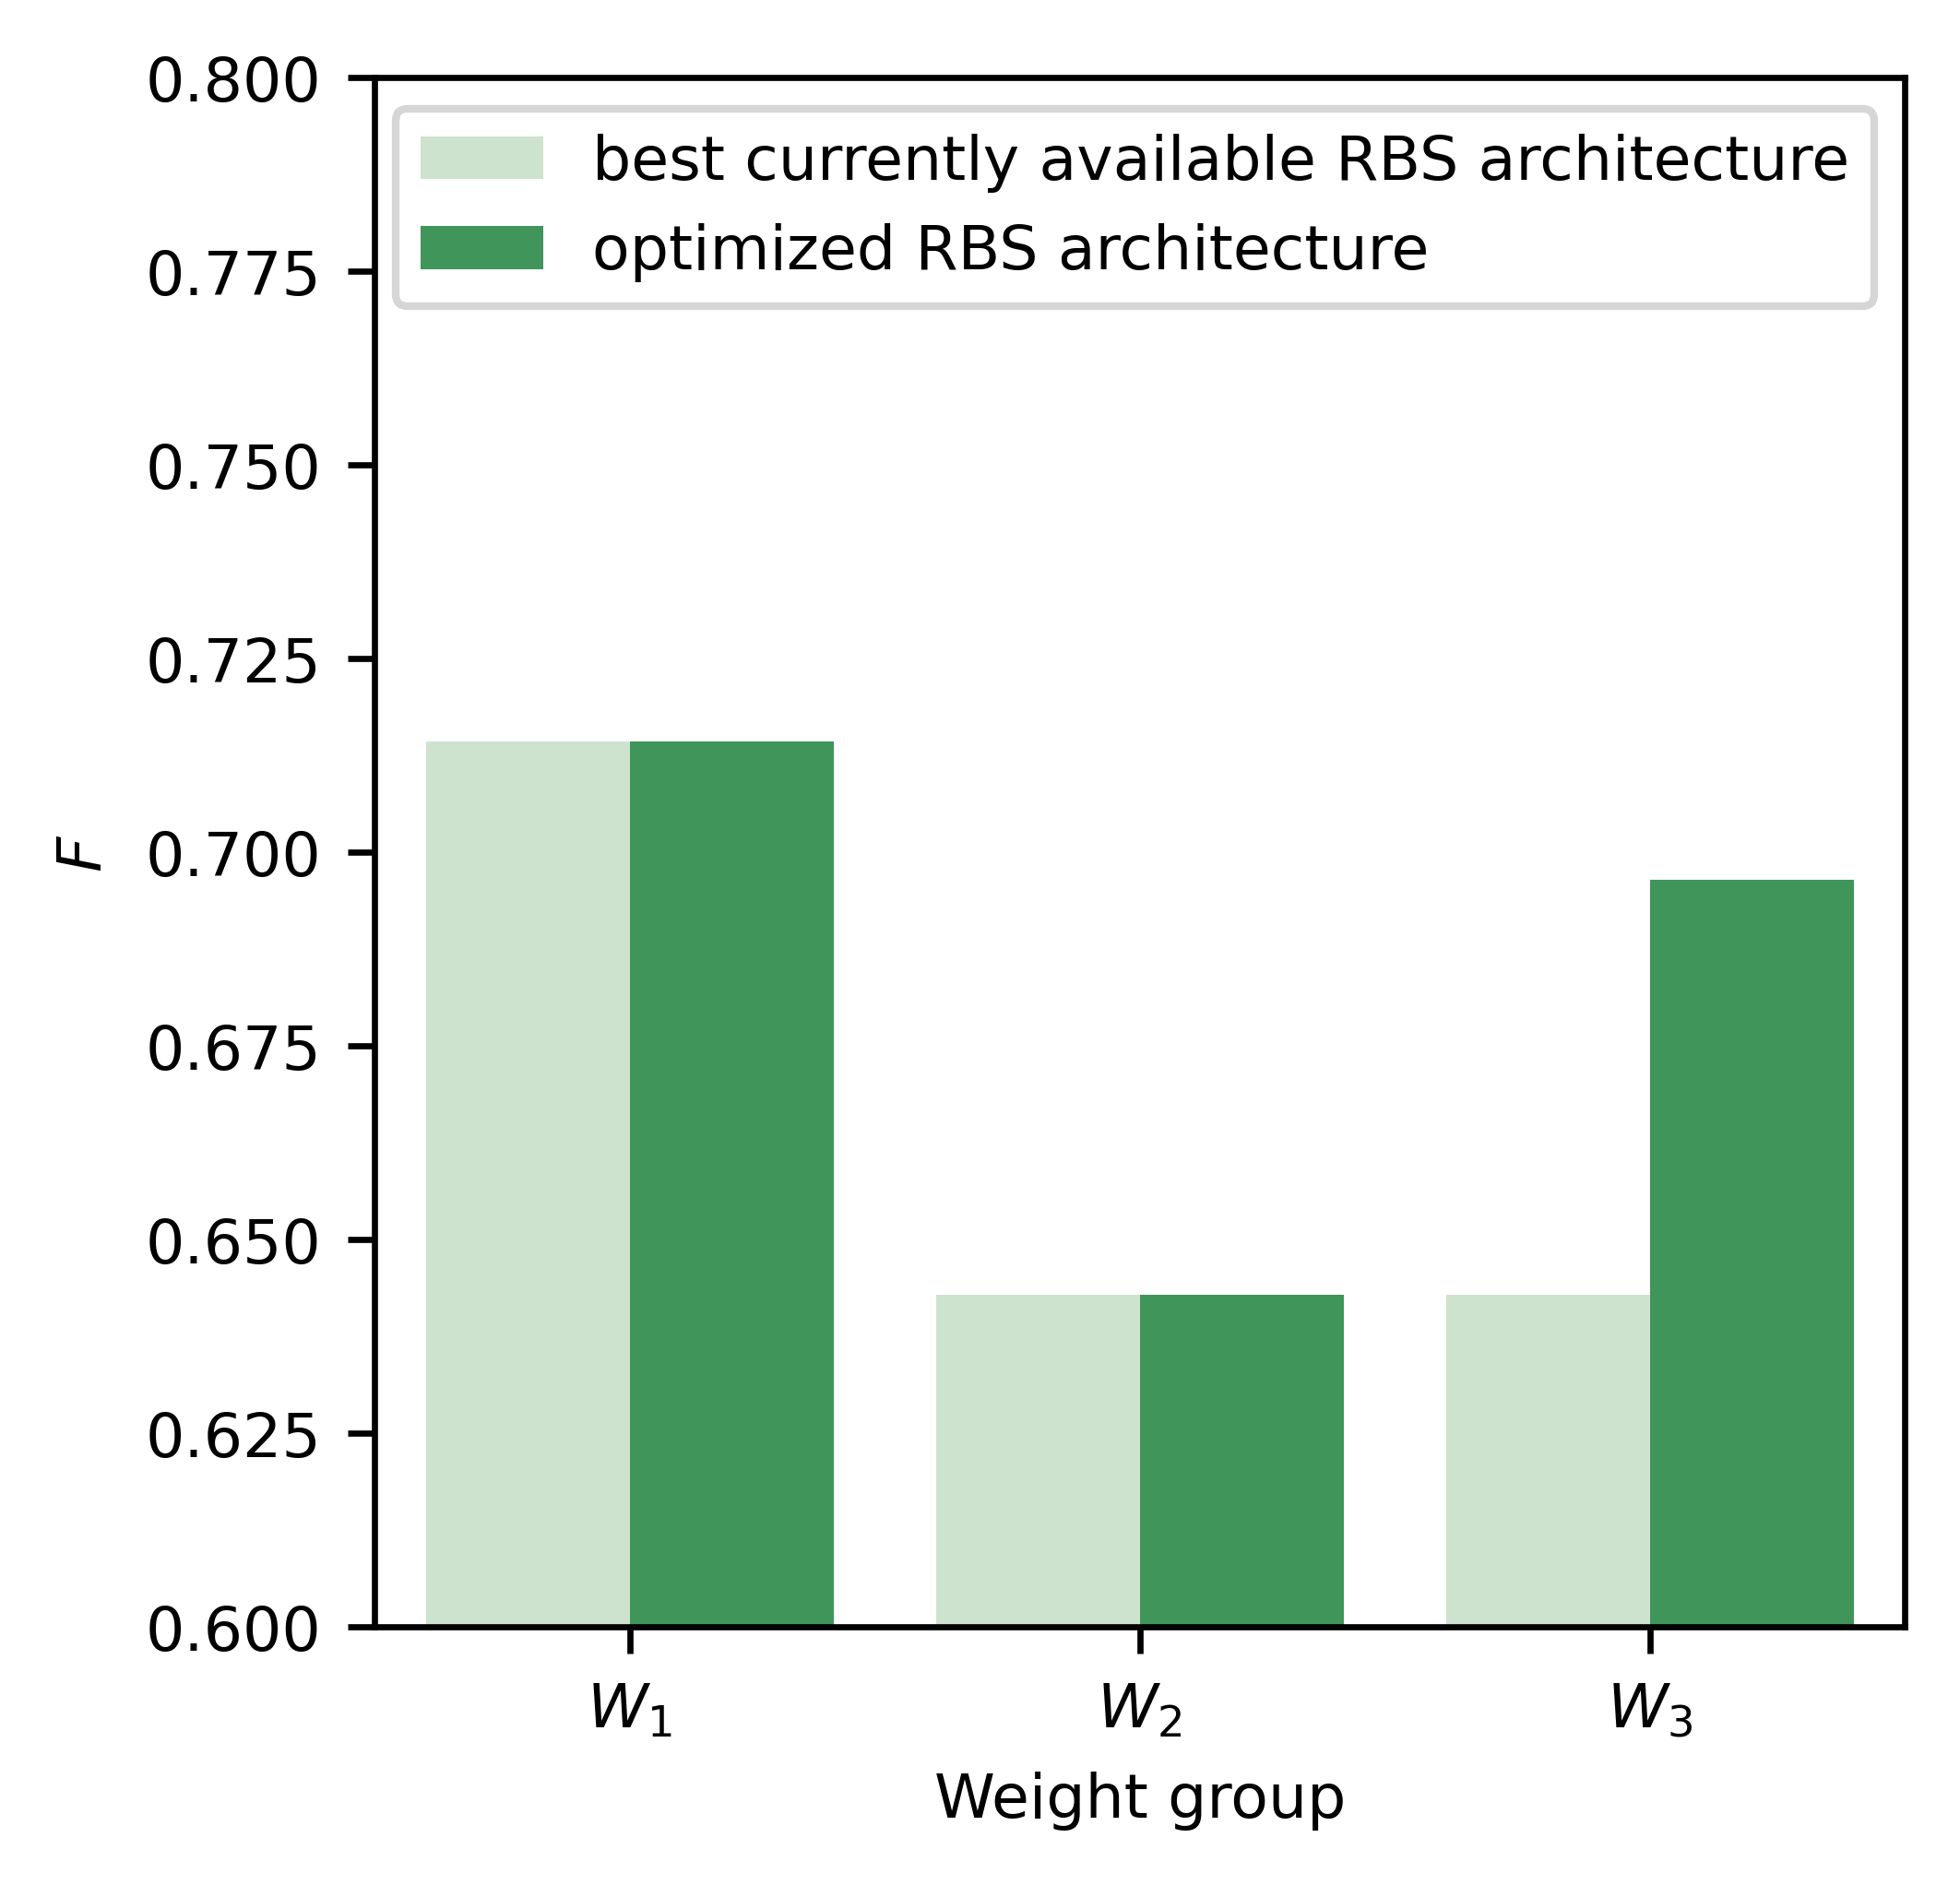

In [6]:
from config import *
import matplotlib.pyplot as plt 
import pandas as pd
from task import *
import seaborn as sns

num_bats = num_bats_hpar
steps = ga_steps
nums = ga_nums
pc = pc_opti
pm = pm_opti
Weigths = [weights1,weights2,weights3]
best_fits, weight_names,rbs_cate = [], [], []
for weight in Weigths:
    fit_rbs = []
    for rbs in rbs_names_eva:
        data_path = './results/indicator_'+rbs+'_'+str(num_bats)+'.csv'
        df_data = pd.read_csv(data_path)
        fitness = 0
        for fea in ['f_vol','f_connect','f_discon','f_cur','f_cost']:
            fitness = fitness + df_data[fea].values[-1] * weight[fea]
        fit_rbs.append(fitness)
    best_fits.append(max(fit_rbs))
    weight_names.append(weight['name'])
    rbs_cate.append('best currently available RBS architecture')

    best_fit, best_chro = select_best_chro2(num_bats,weight,nums,pc,pm,steps)
    best_fits.append(-best_fit)
    weight_names.append(weight['name'])
    rbs_cate.append('optimized RBS architecture')
df_fit = pd.DataFrame({'fitness':best_fits,'weight_names':weight_names,'rbs_cate':rbs_cate})

plt.style.use(['ieee'])
fig,ax = plt.subplots(1,1,figsize=(3.5,4))
color_list = ['#CAE7CB','#31a354']
palet = sns.color_palette(color_list)
bar = sns.barplot(x='weight_names',y='fitness',hue='rbs_cate',data=df_fit, ax=ax, palette=palet)
ax.set_ylim(0.6,0.8)
ax.set_xlabel('Weight group')
ax.set_ylabel('$F$')
ax.set_xticklabels(['$W_1$','$W_2$','$W_3$'])
ax.legend()
plt.subplots_adjust(left=0.2, right=0.99, top=0.95, bottom=0.25)
plt.savefig('./figs/fit_compare_in_weights2.jpg',dpi=300)
        


## 最优解

[0, 7] -- 15
w1 -- [0, 7] 15 -0.7142857142857143 {'f_vol': 1.0, 'f_connect': 1.0, 'f_discon': 1.0, 'f_cur': 0.9999999999999997, 'f_cost': 0.42857142857142855}
[0, 7] -- 15
w2 -- [0, 7] 15 -0.6428571428571429 {'f_vol': 1.0, 'f_connect': 1.0, 'f_discon': 1.0, 'f_cur': 0.9999999999999999, 'f_cost': 0.42857142857142855}
[0, 7] -- 15
w3 -- [0, 7] 15 -0.6964285714285713 {'f_vol': 0.3333333333333333, 'f_connect': 1.0, 'f_discon': 1.0, 'f_cur': 0.9999999999999996, 'f_cost': 0.21428571428571427}


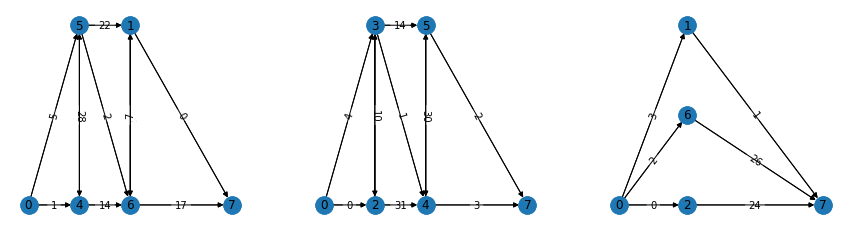

In [2]:
from config import *
import matplotlib.pyplot as plt 
import pandas as pd
from task import *
import seaborn as sns
from mdgraph import MdGraph
import networkx as nx

num_bats = num_bats_hpar
steps = ga_steps
nums = ga_nums
pc = pc_opti
pm = pm_opti
Weigths = [weights1,weights2,weights3]


fig,ax = plt.subplots(1,3,figsize=(15,4))
for i in range(3):
    best_fit, best_chro = select_best_chro2(num_bats,Weigths[i],nums,pc,pm,steps)
    num_sws = (len(best_chro) - 2*num_bats)//2
    Opti = GA(num_bats,num_sws,Weigths[i])
    res = Opti.eva_chro(best_chro,num_bats)
    Mdgra = MdGraph(num_bats,num_sws)
    G = Mdgra.build(best_chro)
    G,terminal = Mdgra.select_circuit(G)
    print(terminal,'--',num_sws)
    G, pos = Mdgra.build_pos(G,terminal)
    nx.draw(G,pos,ax=ax[i])
    edge_labels = nx.get_edge_attributes(G,'edge_label')         
    node_labels = nx.get_node_attributes(G,'name')
    edge_labels_m = {}
    for nodes_name in edge_labels.keys():
        edge_labels_m[(nodes_name[0],nodes_name[1])]=edge_labels[nodes_name]

    nx.draw_networkx_labels(G,pos,labels=node_labels,ax=ax[i])
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels_m,ax=ax[i])
    nx.draw(G,pos,with_labels=True,ax=ax[i])
    print(Weigths[i]['name'],'--',terminal,num_sws,best_fit,res)

    

In [5]:
print(best_chro)

[4, 2, 3, 4, 5, 6, 0, 5, 2, 2, 5, 7, 7, 2, 7, 3, 7, 6, 6, 3, 4, 7, 8, 1, 1, 1, 5, 3, 4, 6, 9, 8, 7, 2, 1, 1]
